In [1]:
import pandas as pd


In [2]:
# Load cleaned stock data
stock_df = pd.read_csv("../data/processed/reliance_stock_cleaned.csv")

# Load daily sentiment data
sentiment_df = pd.read_csv("../data/processed/reliance_daily_sentiment.csv")

# Convert date columns to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

stock_df.head(), sentiment_df.head()


(        Date               Close                High                 Low  \
 0        NaT         RELIANCE.NS         RELIANCE.NS         RELIANCE.NS   
 1 2025-01-16  1261.4119873046875  1269.9280238633037  1246.3223515830243   
 2 2025-01-17   1297.169189453125  1320.7251333812799   1279.888232575373   
 3 2025-01-20     1300.2568359375   1310.764916385877  1295.0775703121099   
 4 2025-01-21  1268.6331787109375   1307.776892128252  1265.1471016946018   
 
                  Open       Volume  
 0         RELIANCE.NS  RELIANCE.NS  
 1  1253.8920943102864     14117603  
 2  1316.9900509904955     29366277  
 3   1310.764916385877     14040244  
 4  1305.2868371165837     14562976  ,
         date  avg_sentiment_score  positive_news_count  negative_news_count  \
 0 2025-01-13              -0.1779                    0                    1   
 1 2025-01-14               0.3818                    1                    0   
 2 2025-01-15               0.6124                    1            

In [3]:
# Merge stock data with sentiment data on date
merged_df = pd.merge(
    stock_df,
    sentiment_df,
    left_on='Date',
    right_on='date',
    how='left'
)

merged_df.head()



,Date,Close,High,Low,Open,Volume,date,avg_sentiment_score,positive_news_count,negative_news_count,neutral_news_count
0,NaT,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,NaT,NaN,NaN,NaN,NaN
1,2025-01-16,1261.4119873046875,1269.9280238633037,1246.3223515830243,1253.8920943102864,14117603,2025-01-16,0.0000,0.0,0.0,1.0
2,2025-01-17,1297.169189453125,1320.7251333812799,1279.888232575373,1316.9900509904955,29366277,2025-01-17,0.6705,1.0,0.0,0.0
3,2025-01-20,1300.2568359375,1310.764916385877,1295.0775703121099,1310.764916385877,14040244,NaT,NaN,NaN,NaN,NaN
4,2025-01-21,1268.6331787109375,1307.776892128252,1265.1471016946018,1305.2868371165837,14562976,NaT,NaN,NaN,NaN,NaN


In [4]:
# Check missing values in merged dataset
merged_df.isnull().sum()


Date                     1
Close                    0
High                     0
Low                      0
Open                     0
Volume                   0
date                   251
avg_sentiment_score    251
positive_news_count    251
negative_news_count    251
neutral_news_count     251
dtype: int64

In [5]:
# Fill missing sentiment values
merged_df['avg_sentiment_score'] = merged_df['avg_sentiment_score'].fillna(0)
merged_df['positive_news_count'] = merged_df['positive_news_count'].fillna(0)
merged_df['negative_news_count'] = merged_df['negative_news_count'].fillna(0)
merged_df['neutral_news_count'] = merged_df['neutral_news_count'].fillna(0)

# Verify again
merged_df.isnull().sum()


Date                     1
Close                    0
High                     0
Low                      0
Open                     0
Volume                   0
date                   251
avg_sentiment_score      0
positive_news_count      0
negative_news_count      0
neutral_news_count       0
dtype: int64

In [6]:
# Drop redundant sentiment date column
merged_df.drop(columns=['date'], inplace=True)

# Final null check
merged_df.isnull().sum()


Date                   1
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
avg_sentiment_score    0
positive_news_count    0
negative_news_count    0
neutral_news_count     0
dtype: int64

In [7]:
# Remove rows where Date is missing
merged_df = merged_df.dropna(subset=['Date'])

# Final verification
merged_df.isnull().sum()


Date                   0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
avg_sentiment_score    0
positive_news_count    0
negative_news_count    0
neutral_news_count     0
dtype: int64

In [8]:
# Sort data by date (very important before lag features)
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# Create lagged sentiment feature (previous day sentiment)
merged_df['sentiment_lag_1'] = merged_df['avg_sentiment_score'].shift(1)

# Create rolling sentiment features
merged_df['sentiment_rolling_3'] = merged_df['avg_sentiment_score'].rolling(window=3).mean()
merged_df['sentiment_rolling_5'] = merged_df['avg_sentiment_score'].rolling(window=5).mean()

merged_df.head(10)


,Date,Close,High,Low,Open,Volume,avg_sentiment_score,positive_news_count,negative_news_count,neutral_news_count,sentiment_lag_1,sentiment_rolling_3,sentiment_rolling_5
0,2025-01-16,1261.4119873046875,1269.9280238633037,1246.3223515830243,1253.8920943102864,14117603,0.0000,0.0,0.0,1.0,NaN,NaN,NaN
1,2025-01-17,1297.169189453125,1320.7251333812799,1279.888232575373,1316.9900509904955,29366277,0.6705,1.0,0.0,0.0,0.0000,NaN,NaN
2,2025-01-20,1300.2568359375,1310.764916385877,1295.0775703121099,1310.764916385877,14040244,0.0000,0.0,0.0,0.0,0.6705,0.2235,NaN
3,2025-01-21,1268.6331787109375,1307.776892128252,1265.1471016946018,1305.2868371165837,14562976,0.0000,0.0,0.0,0.0,0.0000,0.2235,NaN
4,2025-01-22,1272.0196533203125,1277.7966294698952,1263.6530443254642,1273.2149526536994,10273590,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.1341
5,2025-01-23,1258.6231689453125,1272.2686211078578,1256.581275301743,1264.9478840486133,8720682,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.1341
6,2025-01-24,1241.34228515625,1267.9360243063209,1238.5533748820974,1260.9638702056575,14235970,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
7,2025-01-27,1224.4595947265625,1235.515414368934,1215.1468135462453,1234.1708090151494,9536019,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
8,2025-01-28,1229.4896240234375,1239.7984277662488,1213.6528493538253,1233.0752790316255,10568025,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
9,2025-01-29,1230.585205078125,1237.8063647194172,1223.1648896668228,1231.0832160878692,5928156,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000


In [9]:
# Create next-day close price
merged_df['next_day_close'] = merged_df['Close'].shift(-1)

# Define target: 1 if price goes up, else 0
merged_df['target'] = (merged_df['next_day_close'] > merged_df['Close']).astype(int)

merged_df[['Date', 'Close', 'next_day_close', 'target']].head(10)


,Date,Close,next_day_close,target
0,2025-01-16,1261.4119873046875,1297.169189453125,1
1,2025-01-17,1297.169189453125,1300.2568359375,1
2,2025-01-20,1300.2568359375,1268.6331787109375,0
3,2025-01-21,1268.6331787109375,1272.0196533203125,1
4,2025-01-22,1272.0196533203125,1258.6231689453125,0
5,2025-01-23,1258.6231689453125,1241.34228515625,0
6,2025-01-24,1241.34228515625,1224.4595947265625,0
7,2025-01-27,1224.4595947265625,1229.4896240234375,1
8,2025-01-28,1229.4896240234375,1230.585205078125,1
9,2025-01-29,1230.585205078125,1248.0654296875,1


In [10]:
# Drop rows with missing values created by lags and target
model_df = merged_df.dropna().reset_index(drop=True)

# Final check
model_df.isnull().sum(), model_df.shape


(Date                   0
 Close                  0
 High                   0
 Low                    0
 Open                   0
 Volume                 0
 avg_sentiment_score    0
 positive_news_count    0
 negative_news_count    0
 neutral_news_count     0
 sentiment_lag_1        0
 sentiment_rolling_3    0
 sentiment_rolling_5    0
 next_day_close         0
 target                 0
 dtype: int64,
 (247, 15))

In [11]:
model_df.describe()


,Date,avg_sentiment_score,positive_news_count,negative_news_count,neutral_news_count,sentiment_lag_1,sentiment_rolling_3,sentiment_rolling_5,target
count,247,247.0,247.0,247.0,247.0,247.0,247.0,247.000000,247.000000
mean,2025-07-21 15:15:18.218623488,0.0,0.0,0.0,0.0,0.0,0.0,0.001086,0.497976
min,2025-01-22 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,2025-04-24 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,2025-07-22 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,2025-10-20 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,2026-01-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.134100,1.000000
std,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.012042,0.501011


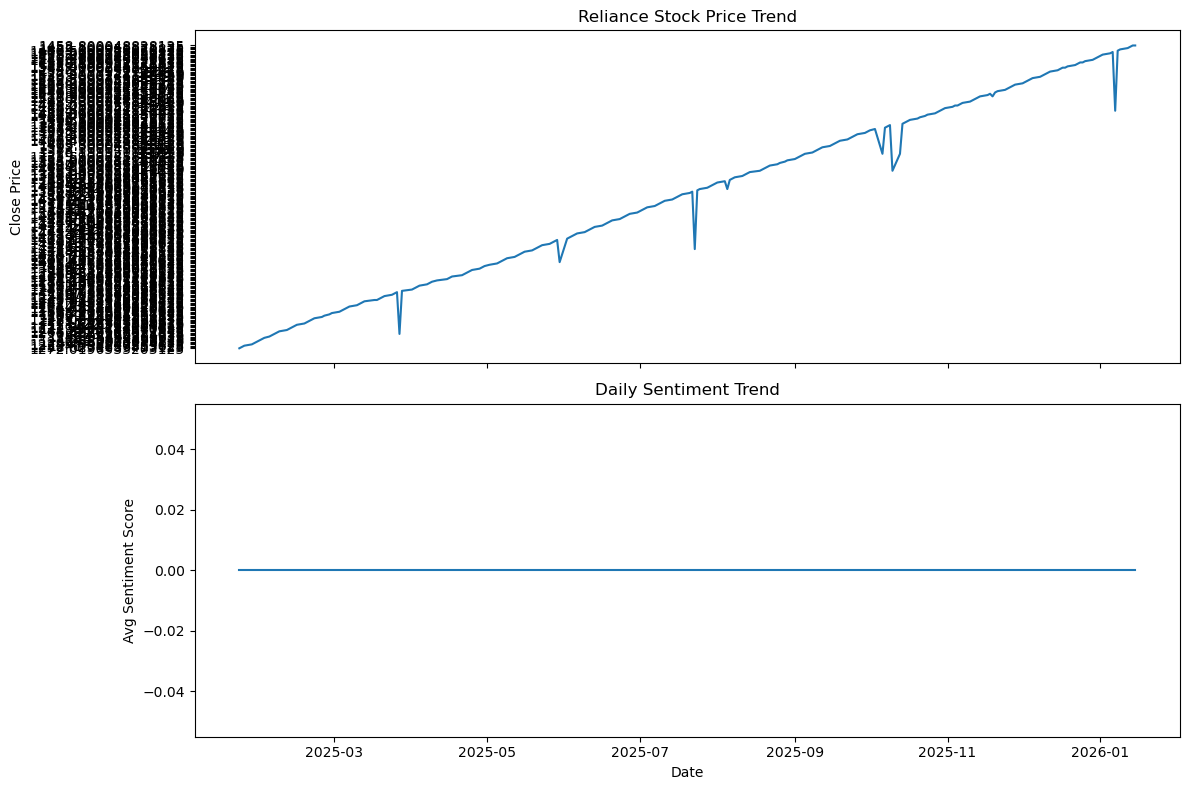

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# Plot stock price
ax1.plot(model_df['Date'], model_df['Close'])
ax1.set_ylabel('Close Price')
ax1.set_title('Reliance Stock Price Trend')

# Plot sentiment
ax2.plot(model_df['Date'], model_df['avg_sentiment_score'])
ax2.set_ylabel('Avg Sentiment Score')
ax2.set_xlabel('Date')
ax2.set_title('Daily Sentiment Trend')

plt.tight_layout()
plt.show()


In [13]:
model_df['sentiment_label'] = model_df['avg_sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

model_df['sentiment_label'].value_counts()


sentiment_label
Neutral    247
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select feature columns
feature_cols = [
    'avg_sentiment_score',
    'sentiment_lag_1',
    'sentiment_rolling_3',
    'sentiment_rolling_5',
    'positive_news_count',
    'negative_news_count',
    'neutral_news_count'
]

X = model_df[feature_cols]
y = model_df['target']

X.head(), y.head()


(   avg_sentiment_score  sentiment_lag_1  sentiment_rolling_3  \
 0                  0.0              0.0                  0.0   
 1                  0.0              0.0                  0.0   
 2                  0.0              0.0                  0.0   
 3                  0.0              0.0                  0.0   
 4                  0.0              0.0                  0.0   
 
    sentiment_rolling_5  positive_news_count  negative_news_count  \
 0               0.1341                  0.0                  0.0   
 1               0.1341                  0.0                  0.0   
 2               0.0000                  0.0                  0.0   
 3               0.0000                  0.0                  0.0   
 4               0.0000                  0.0                  0.0   
 
    neutral_news_count  
 0                 0.0  
 1                 0.0  
 2                 0.0  
 3                 0.0  
 4                 0.0  ,
 0    0
 1    0
 2    0
 3    1
 4    1
 

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train.shape, X_test.shape


((197, 7), (50, 7))

In [18]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [20]:
# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_pred,
        zero_division=0
    )
)



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.48      1.00      0.65        24

    accuracy                           0.48        50
   macro avg       0.24      0.50      0.32        50
weighted avg       0.23      0.48      0.31        50



In [21]:
#TEST
model_df.head()
model_df.tail()
model_df.shape
model_df.isnull().sum()


Date                   0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
avg_sentiment_score    0
positive_news_count    0
negative_news_count    0
neutral_news_count     0
sentiment_lag_1        0
sentiment_rolling_3    0
sentiment_rolling_5    0
next_day_close         0
target                 0
sentiment_label        0
dtype: int64

In [22]:
model_df[['Date','avg_sentiment_score','sentiment_lag_1','target']].head(10)


,Date,avg_sentiment_score,sentiment_lag_1,target
0,2025-01-22,0.0,0.0,0
1,2025-01-23,0.0,0.0,0
2,2025-01-24,0.0,0.0,0
3,2025-01-27,0.0,0.0,1
4,2025-01-28,0.0,0.0,1
5,2025-01-29,0.0,0.0,1
6,2025-01-30,0.0,0.0,1
7,2025-01-31,0.0,0.0,0
8,2025-02-01,0.0,0.0,0
9,2025-02-03,0.0,0.0,1


In [23]:
y_test.value_counts()
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()


1    50
Name: count, dtype: int64